# Using SQLAlchemy

In [179]:
import sqlalchemy as db
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt

## Connecting to database

In [180]:
# connecting to database sql_challenge created in postgresql
engine = db.create_engine('postgresql://localhost:5432/etl-project')
connection = engine.connect()
metadata = db.MetaData()

In [181]:
#to find all the tables for the database (it should be empty)
engine.table_names()

/var/folders/ld/_spx9cwj74z4zm921xp1zssh0000gn/T/ipykernel_2268/3558990862.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


[]

# Creating Table


In [182]:
#creating new empty tables 
election = db.Table('election', metadata,
              db.Column('County', db.String(100), primary_key=True, nullable=False), 
              db.Column('State', db.String(100),primary_key=True, nullable=False),
                db.Column('Republic', db.Float()), 
                db.Column('Democrate', db.Float()), 
                db.Column('Win', db.String(100)) 
              )

census = db.Table('census', metadata,
              db.Column('County', db.String(), primary_key=True, nullable=False), 
              db.Column('State', db.String(20), primary_key=True, nullable=False),
                  db.Column('Population', db.Float()), 
                  db.Column('Median Age', db.Float()),
                  db.Column('Household Income', db.Float()), 
                  db.Column('Poverty Rate', db.Float()), 
                  db.Column('Unemployment Rate', db.Float()), 
                  db.Column('High School Rate', db.Float()), 
                  db.Column('College Rate', db.Float()), 
                  db.Column('Uneducated Rate', db.Float()), 
                  db.Column('White Population Rate', db.Float()), 
                  db.Column('Black Population Rate', db.Float()),
                  db.Column('Hispanic Population Rate', db.Float()),
                  db.Column('Asian Population Rate', db.Float())                  
              )

vaccine = db.Table('vaccine', metadata,
                   db.Column('Date', db.Date()),
                  db.Column('County', db.String(100), primary_key=True, nullable=False), 
                  db.Column('State', db.String(100),primary_key=True, nullable=False),  
                   db.Column('Series_Complete_Pop_Pct', db.Float()),
                   db.Column('Fully_Vaccinated', db.Float()),
                   db.Column('Fully_Vaccinated_12+', db.Float()),
                   db.Column('Fully_Vaccinated_18+', db.Float()),
                   db.Column('Fully_Vaccinated_65+', db.Float()),
                   db.Column('Completeness_pct', db.Float()),
                   db.Column('Administered_Dose1_Recip', db.Float()),
                   db.Column('Partially_Vaccinated', db.Float()),
                   db.Column('Partially_Vaccinated_12+', db.Float()),
                   db.Column('Partially_Vaccinated_18+', db.Float()),
                   db.Column('Partially_Vaccinated_65+', db.Float()),     
              )

metadata.create_all(engine) #Creates the tables

In [183]:
#to find all the tables for the database(it will show all the tables created)
engine.table_names()

/var/folders/ld/_spx9cwj74z4zm921xp1zssh0000gn/T/ipykernel_2268/1032459306.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['election', 'census', 'vaccine']

In [184]:
#getting the tables from database
election = db.Table('election', metadata, autoload=True, autoload_with=engine)
census = db.Table('census', metadata, autoload=True, autoload_with=engine)
vaccine = db.Table('vaccine', metadata, autoload=True, autoload_with=engine)

## Inserting values in tables from our cleaned data csv files 


In [187]:
#For table election
path_election=os.path.join('data', 'cleaned_data', 'election_data.csv')
  
with open(path_election, 'r', encoding="utf-8") as elec:
    next(elec) #removing header
    csv_election = csv.reader(elec, delimiter=',')
    engine.execute(
        election.insert(),
        [{'County': row[0],
         'State': row[1],
         'Republic': row[2],
         'Democrate':row[3],
         'Win': row[4]} 
            for row in csv_election]
    )
#For table cdc_vaccine
path_vaccine=os.path.join('data', 'cleaned_data', 'vaccine_data.csv')

with open(path_vaccine, 'r', encoding="utf-8") as vacc:
    next(vacc) #removing header
    csv_vaccine = csv.reader(vacc, delimiter=',')
    engine.execute(
        vaccine.insert(),
        [{'Date': row[0],
          'County': row[1],
          'State': row[2],
          'Series_Complete_Pop_Pct': row[3],
           'Fully_Vaccinated': row[4],
          'Fully_Vaccinated_12+': row[5],
          'Fully_Vaccinated_18+': row[6],
           'Fully_Vaccinated_65+': row[7],
          'Completeness_pct': row[8],
          'Administered_Dose1_Recip': row[9],
           'Partially_Vaccinated': row[10],
          'Partially_Vaccinated_12+': row[11],
           'Partially_Vaccinated_18+': row[12],
          'Partially_Vaccinated_65+': row[13]}
         for row in csv_vaccine]
    )
    

#For table census
path_census=os.path.join('data', 'cleaned_data', 'census_data.csv')

with open(path_census, 'r', encoding="utf-8") as cens:
    next(cens) #removing header
    csv_census = csv.reader(cens, delimiter=',')
    engine.execute(
        census.insert(),
        [{'County': row[0],
          'State': row[1],
          'Population': row[2],
          'Median Age': row[3],
          'Household Income': row[4],
           'Poverty Rate': row[5],
          'Unemployment Rate': row[6],
          'High School Rate': row[7],
          'College Rate': row[8],
           'Uneducated Rate': row[9], 
          'White Population Rate': row[10],
          'Black Population Rate': row[11],
           'Hispanic Population Rate': row[12],
          'Asian Population Rate': row[13]} 
            for row in csv_census]
    )


## Also can use to_sql to insert data 

In [189]:
#For table election
path_election=os.path.join('data', 'cleaned_data', 'election_data.csv')

with open(path_election, 'r') as elec:
    df_elec = pd.read_csv(elec)
df_elec.to_sql('election', con=engine, index=False, if_exists='replace')


#For table cdc_vaccine
path_vaccine=os.path.join('data', 'cleaned_data', 'vaccine_data.csv')

with open(path_vaccine, 'r') as vacc:
    df_vaccine = pd.read_csv(vacc)
df_vaccine.to_sql('vaccine', con=engine, index=False, if_exists='replace')

#For table census
path_census=os.path.join('data', 'cleaned_data', 'census_data.csv')

with open(path_census, 'r') as cens:
    df_census = pd.read_csv(cens)
df_census.to_sql('census', con=engine, index=False, if_exists='replace')



In [190]:
# Print full table metadata for census table
print(repr(metadata.tables['census']))

Table('census', MetaData(), Column('County', String(), table=<census>, primary_key=True, nullable=False), Column('State', String(length=20), table=<census>, primary_key=True, nullable=False), Column('Population', Float(), table=<census>), Column('Median Age', Float(), table=<census>), Column('Household Income', Float(), table=<census>), Column('Poverty Rate', Float(), table=<census>), Column('Unemployment Rate', Float(), table=<census>), Column('High School Rate', Float(), table=<census>), Column('College Rate', Float(), table=<census>), Column('Uneducated Rate', Float(), table=<census>), Column('White Population Rate', Float(), table=<census>), Column('Black Population Rate', Float(), table=<census>), Column('Hispanic Population Rate', Float(), table=<census>), Column('Asian Population Rate', Float(), table=<census>), schema=None)


In [191]:
# columns of census table
census.c.keys()

['County',
 'State',
 'Population',
 'Median Age',
 'Household Income',
 'Poverty Rate',
 'Unemployment Rate',
 'High School Rate',
 'College Rate',
 'Uneducated Rate',
 'White Population Rate',
 'Black Population Rate',
 'Hispanic Population Rate',
 'Asian Population Rate']

# Querying


### 1. Querying by joining two tables

In [192]:
### sql
sql_1= '''SELECT e."County", e."Win", v."Completeness_pct", v."Fully_Vaccinated_12+" 
       FROM election AS e
       JOIN vaccine AS v
       ON e."County"=v."County" AND e."State"=v."State" '''

In [193]:
#using text
results_1=connection.execute(db.text(sql_1)).fetchall()
df_1 = pd.DataFrame(results_1, columns=(['County','Win', 'Completeness_pct', 
                                         "Fully_Vaccinated_12+ "]))
df_1


,County,Win,Completeness_pct,Fully_Vaccinated_12+
0,Abbeville County,R,93.9,41.3
1,Accomack County,R,82.7,74.3
2,Ada County,R,97.6,0.0
3,Adair County,R,97.5,52.3
4,Adair County,R,94.4,40.7
...,...,...,...,...
2977,Yuma County,R,97.7,69.9
2978,Yuma County,R,97.4,47.4
2979,Zapata County,R,99.1,71.8
2980,Zavala County,D,99.1,57.3


In [194]:
#using sql_alchemy
res_1=connection.execute(db.select([election.c.County,
                                   election.c.Win,
                                   vaccine.c.Completeness_pct,
                                   vaccine.c.Fully_Vaccinated])
                         .join(vaccine, db.and_(election.c.County==vaccine.c.County,
                                               election.c.State==vaccine.c.State))
                         ).fetchall()
df_alc1 = pd.DataFrame(res_1, columns=(['County','Win', 'Completeness_pct', 
                                         "Fully_Vaccinated "]))
df_alc1

,County,Win,Completeness_pct,Fully_Vaccinated
0,Abbeville County,R,93.9,8886.0
1,Accomack County,R,82.7,20719.0
2,Ada County,R,97.6,250890.0
3,Adair County,R,97.5,3199.0
4,Adair County,R,94.4,6830.0
...,...,...,...,...
2977,Yuma County,R,97.7,124386.0
2978,Yuma County,R,97.4,3862.0
2979,Zapata County,R,99.1,7902.0
2980,Zavala County,D,99.1,5509.0


## Education-Top 50 counties which are vaccinated more

In [246]:
sql_2='''SELECT e."County", e."Win", c."Uneducated Rate",  v."Completeness_pct", v."Fully_Vaccinated_12+" 
       FROM election AS e
       JOIN census AS c
       ON e."County"=c."County" AND e."State"=c."State" 
       JOIN vaccine as v
       ON c."County"=v."County" AND c."State"=v."State" 
       ORDER BY c."Uneducated Rate"  DESC
       LIMIT 50''' 

In [247]:
#using text
results_2=connection.execute(db.text(sql_2)).fetchall()
df_2 = pd.DataFrame(results_2, columns=(['County', 'Win', 
                                         'Uneducated Rate',
                                         'Completeness_pct', 'Fully_Vaccinated 12+']))
df_2

,County,Win,Uneducated Rate,Completeness_pct,Fully_Vaccinated 12+
0,Jeff Davis County,R,11.899767,99.1,49.2
1,Terrell County,R,10.993071,99.1,57.2
2,Metcalfe County,R,10.393460,94.4,42.6
3,Clarke County,R,9.784851,82.7,64.3
4,Webster County,R,8.532412,60.0,35.5
5,Ochiltree County,R,7.538854,99.1,43.6
6,Choctaw County,R,5.781313,92.6,66.2
7,Coweta County,R,4.892517,57.9,33.1
8,Dimmit County,D,4.788508,99.1,69.1
9,Clark County,R,4.616307,97.6,0.0


In [237]:
#using sql_alchemy
res_2=connection.execute(db.select([election.c.County,
                                   election.c.Win,
                                    census.c['Uneducated Rate'],
                                    vaccine.c['Fully_Vaccinated_12+'],
                                   vaccine.c.Completeness_pct])        
                         .join(census, db.and_(election.c.County==census.c.County,
                                               election.c.State==census.c.State))
                         .join(vaccine, db.and_(census.c.County==vaccine.c.County,
                                               census.c.State==vaccine.c.State))
                         .order_by(vaccine.c['Fully_Vaccinated_12+'].desc())
                         .limit(50)
                                    ).fetchall()
df_alc2 = pd.DataFrame(res_2, columns=(['County', 'Win', 
                                         'Uneducated Rate',
                                         'Completeness_pct', 'Fully_Vaccinated 12+']))
df_alc2

,County,Win,Uneducated Rate,Household Income,Completeness_pct,Fully_Vaccinated 12+
0,Santa Cruz County,D,-9.519308e+07,0.566091,99.9,97.7
1,Chattahoochee County,R,4.819850e+04,0.115539,99.9,57.9
2,Presidio County,D,-2.222018e+08,2.120632,98.2,99.1
3,San Juan County,D,5.217050e+04,0.373451,94.6,97.4
4,Big Horn County,D,-6.661877e+07,0.003667,93.5,95.7
5,Teton County,D,-2.856614e+08,0.131002,92.0,96.4
6,Webb County,D,4.720178e+04,1.377582,91.7,99.1
7,Montgomery County,D,-1.468945e+07,1.083538,91.1,98.7
8,Glacier County,D,4.461225e+04,0.693152,91.0,95.7
9,Blaine County,D,3.960314e+04,0.232341,90.8,95.7


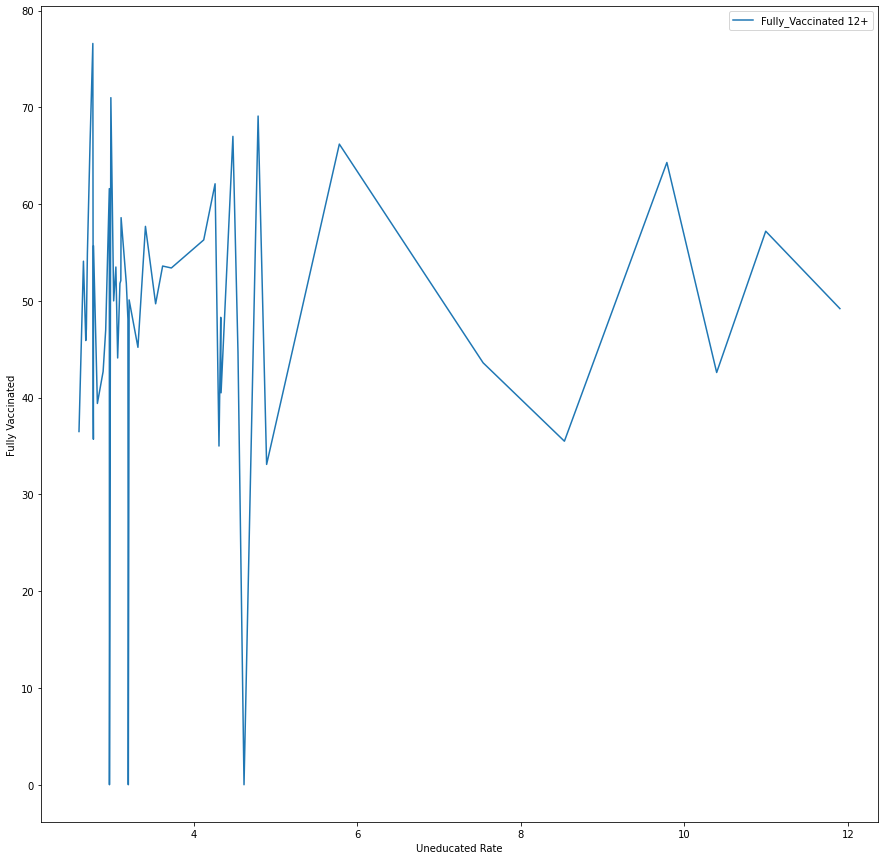

In [252]:

fig, ax=plt.subplots(figsize=(15,15))
df_2.plot(x='Uneducated Rate', y='Fully_Vaccinated 12+'
           ,ax=ax)
ax.set_ylabel("Fully Vaccinated")
plt.show()

## Poltics-Top 50 counties which are vaccinated more

In [228]:

sql_3='''SELECT e."County", e."Win", c."White Population Rate",c."Black Population Rate",c."Hispanic Population Rate",c."Asian Population Rate",  v."Completeness_pct", v."Fully_Vaccinated_12+" 
       FROM election AS e
       JOIN census AS c
       ON e."County"=c."County" AND e."State"=c."State" 
       JOIN vaccine as v
       ON c."County"=v."County" AND c."State"=v."State" 
       ORDER BY v."Fully_Vaccinated_12+" DESC
       LIMIT 50'''


In [227]:
#using text
results_3=connection.execute(db.text(sql_3)).fetchall()
df_3 = pd.DataFrame(results_3, columns=(['County', 'Win', 
                                         'White Population Rate','Black Population Rate',
                                         'Hispanic Population Rate','Asian Population Rate',
                                         'Completeness_pct', 'Fully_Vaccinated 12+ ']))
df_3

,County,Win,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Completeness_pct,Fully_Vaccinated 12+
0,Santa Cruz County,D,92.988999,0.374625,44.044838,0.372751,97.7,99.9
1,Chattahoochee County,R,62.999587,26.517859,10.421011,1.795074,57.9,99.9
2,Presidio County,D,95.794722,0.000000,85.939172,0.614241,99.1,98.2
3,San Juan County,D,83.993231,0.653539,17.797211,0.271601,97.4,94.6
4,Big Horn County,D,31.664746,0.007334,2.992276,0.022002,95.7,93.5
5,Teton County,D,95.265630,0.584363,5.605165,2.328911,96.4,92.0
6,Webb County,D,96.841919,0.258978,94.901047,0.301662,99.1,91.7
7,Montgomery County,D,61.695103,16.173661,16.210964,11.415185,98.7,91.1
8,Glacier County,D,48.757754,0.158194,2.847720,0.166652,95.7,91.0
9,Blaine County,D,71.694116,0.169674,4.700255,0.038153,95.7,90.8


# Plotting

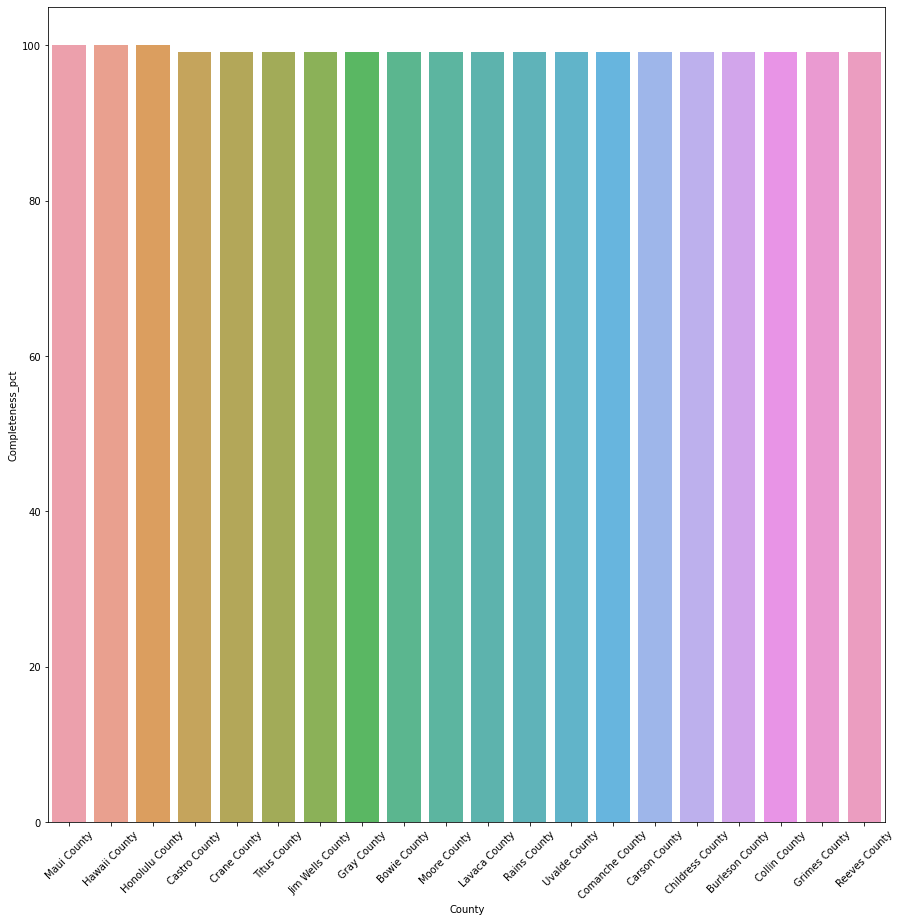

In [178]:
county=df_1.nlargest(20, 'Completeness_pct')
fig, ax=plt.subplots(figsize=(15,15))
sns.barplot(x='County', y='Completeness_pct',
            data=county, alpha=0.9,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

# Using SQLAlchemy ORM

# Reflect Tables into SQLAlchemy ORM

In [200]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_, or_

In [201]:
# create engine to hawaii.sqlite
engine = create_engine('postgresql://localhost:5432/tets1')
conn=engine.connect()

In [202]:
# Use the Inspector to explore the database and print the table names
inspector=inspect(engine)
inspector.get_table_names()

['election', 'census', 'vaccine']

In [203]:
# Use Inspector to print the column names and types
print('election table')
print('*'*50)
columns=inspector.get_columns('election')
for column in columns:
    print(column['name'], column['type'])

print('')
print('census table')
print('*'*50)
columns=inspector.get_columns('census')
for column in columns:
    print(column['name'], column['type'])
    
print('')
print('vaccine table')
print('*'*50)
columns=inspector.get_columns('vaccine')
for column in columns:
    print(column['name'], column['type'])

election table
**************************************************
County VARCHAR(100)
State VARCHAR(100)
Republic DOUBLE_PRECISION
Democrate DOUBLE_PRECISION
Win VARCHAR(100)

census table
**************************************************
County VARCHAR
State VARCHAR(20)
Population DOUBLE_PRECISION
Median Age DOUBLE_PRECISION
Household Income DOUBLE_PRECISION
Poverty Rate DOUBLE_PRECISION
Unemployment Rate DOUBLE_PRECISION
High School Rate DOUBLE_PRECISION
College Rate DOUBLE_PRECISION
Uneducated Rate DOUBLE_PRECISION
White Population Rate DOUBLE_PRECISION
Black Population Rate DOUBLE_PRECISION
Hispanic Population Rate DOUBLE_PRECISION
Asian Population Rate DOUBLE_PRECISION

vaccine table
**************************************************
Date DATE
County VARCHAR(100)
State VARCHAR(100)
Series_Complete_Pop_Pct DOUBLE_PRECISION
Fully_Vaccinated DOUBLE_PRECISION
Fully_Vaccinated_12+ DOUBLE_PRECISION
Fully_Vaccinated_18+ DOUBLE_PRECISION
Fully_Vaccinated_65+ DOUBLE_PRECISION
Completeness

In [204]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [205]:
# View all of the classes that automap found
Base.classes.keys()

['election', 'census', 'vaccine']

In [206]:
# Save references to each table
Election = Base.classes.election
Census = Base.classes.census
Vaccine=Base.classes.vaccine

In [207]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploring election table

In [208]:
#using pd.read_sql to select and display (also able to see columns name)
df_election=pd.read_sql("SELECT * FROM election", conn)

df_election.head()

,County,State,Republic,Democrate,Win
0,Abbeville County,SC,0.661,0.330,R
1,Abbot County,ME,0.691,0.290,R
2,Abington County,MA,0.439,0.537,D
3,Acadia County,LA,0.795,0.191,R
4,Accomack County,VA,0.542,0.447,R


In [209]:
# Perform a query to retrieve the county where democrat won
democrat=session.query(Election.County, Election.State).filter(
                                       Election.Win =='D').all()


In [210]:
# Perform a query to retrieve the county where Repbulican won
repbulic=session.query(Election.County, Election.State).filter(
                                       Election.Win =='R').all()

In [211]:
# Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
stmt=session.query(Election.County, Election.State).filter(
                                       Election.Win =='R').statement
df_rep=pd.read_sql_query(stmt, session.bind)
df_rep

,County,State
0,Abbeville County,SC
1,Abbot County,ME
2,Acadia County,LA
3,Accomack County,VA
4,Acton County,ME
...,...,...
3212,Young County,TX
3213,Yuba County,CA
3214,Yuma County,CO
3215,Yuma County,AZ


In [212]:
# Design a query to calculate the total number County in the dataset
session.query(Election.County).count()

4490

# Exploring vaccine table

In [213]:
#using pd.read_sql to select and display (also able to see columns name)
df_vaccine=pd.read_sql("SELECT * FROM vaccine", conn)

df_vaccine

,Date,County,State,Series_Complete_Pop_Pct,Fully_Vaccinated,Fully_Vaccinated_12+,Fully_Vaccinated_18+,Fully_Vaccinated_65+,Completeness_pct,Administered_Dose1_Recip,Partially_Vaccinated,Partially_Vaccinated_12+,Partially_Vaccinated_18+,Partially_Vaccinated_65+
0,2021-10-28,Marengo County,AL,49.2,9272.0,57.7,60.1,78.0,92.6,11422.0,60.6,71.0,73.5,90.0
1,2021-10-28,Taylor County,KY,48.6,12516.0,57.3,59.3,82.4,94.4,14120.0,54.8,64.7,66.8,89.5
2,2021-10-28,Jefferson County,AR,37.7,25225.0,44.0,45.0,61.7,90.3,32370.0,48.4,56.4,57.2,74.0
3,2021-10-28,Musselshell County,MT,31.1,1443.0,35.2,37.4,53.9,95.7,1574.0,34.0,38.4,40.7,56.4
4,2021-10-28,Powder River County,MT,19.6,330.0,21.9,23.3,37.8,95.7,362.0,21.5,24.0,25.5,39.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,2021-10-28,Unknown County,NJ,0.0,379004.0,0.0,0.0,0.0,93.6,0.0,0.0,0.0,0.0,0.0
3279,2021-10-28,Silver Bow County,MT,56.4,19709.0,65.4,66.4,87.7,95.7,21103.0,60.4,70.0,70.9,92.9
3280,2021-10-28,Walla Walla County,WA,57.2,34753.0,66.1,67.6,83.4,96.1,38185.0,62.8,72.6,74.2,92.4
3281,2021-10-28,Franklin County,KS,45.6,11637.0,53.8,56.5,83.0,93.6,12893.0,50.5,59.6,62.5,90.0


# Exploring census table

In [214]:
#using pd.read_sql to select and display (also able to see columns name)
df_census=pd.read_sql("SELECT * FROM census", conn)

df_census

,County,State,Population,Median Age,Household Income,Poverty Rate,Unemployment Rate,High School Rate,College Rate,Uneducated Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate
0,Aasco Municipio,PR,26686.000000,42.700000,1.989800e+04,45.731844,3.855954,19.253541,10.488646,2.787979,82.597617,1.727498,95.061081,0.000000
1,Abbeville County,SC,4084.200000,39.900000,3.914320e+04,22.958482,2.146448,20.175639,6.307386,0.731876,65.861217,30.431803,1.097323,0.523793
2,Acadia Parish,LA,6208.700000,36.360000,4.355100e+04,20.894436,3.432778,23.095957,7.351045,0.985701,86.836943,10.600556,2.720125,0.061823
3,Accomack County,VA,990.090909,48.833333,-1.009644e+08,14.984460,1.492080,26.353785,8.400832,0.576869,73.265729,24.703698,5.307683,0.425414
4,Ada County,ID,30571.600000,37.760000,6.859527e+04,10.538547,1.974483,11.349687,17.948706,0.390195,90.713137,1.276617,7.991648,2.490008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,Yuma County,AZ,20955.000000,38.250000,4.233260e+04,18.990481,3.769920,13.993028,5.376302,2.378759,70.144058,0.966517,66.587098,0.678975
3216,Yuma County,CO,1402.142857,40.157143,5.246343e+04,13.854494,1.191867,19.333835,11.042061,0.314244,98.336295,0.346629,14.767461,0.019532
3217,Zapata County,TX,4667.666667,31.433333,6.493133e+04,27.146749,5.689971,15.544681,3.799101,1.059885,94.897257,0.000000,97.133219,0.286540
3218,Zavala County,TX,4017.000000,32.333333,3.260533e+04,39.085347,3.397647,11.545223,3.748947,1.901093,97.666404,0.148230,90.042087,0.040763


# Analysis by joining tables

In [215]:
#using join to combined two tables
#using read sql query 
result=session.query(Vaccine, Census).filter(and_(Vaccine.County == Census.County,
                                                 Vaccine.State == Census.State)).statement
df_comb=pd.read_sql_query(result,session.bind)
df_comb

,Date,County,State,Series_Complete_Pop_Pct,Fully_Vaccinated,Fully_Vaccinated_12+,Fully_Vaccinated_18+,Fully_Vaccinated_65+,Completeness_pct,Administered_Dose1_Recip,...,Household Income,Poverty Rate,Unemployment Rate,High School Rate,College Rate,Uneducated Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate
0,2021-10-28,Marengo County,AL,49.2,9272.0,57.7,60.1,78.0,92.6,11422.0,...,-7.403909e+07,22.786474,2.647748,25.782691,5.002504,3.411480,40.322362,59.180225,0.527378,0.000000
1,2021-10-28,Taylor County,KY,48.6,12516.0,57.3,59.3,82.4,94.4,14120.0,...,5.948367e+04,16.342587,5.291827,28.858116,2.756087,0.600595,96.666428,1.419736,0.801276,0.353962
2,2021-10-28,Jefferson County,AR,37.7,25225.0,44.0,45.0,61.7,90.3,32370.0,...,-6.663338e+07,30.928672,3.659781,26.194793,8.122132,0.279221,45.989832,48.699059,4.539780,0.643552
3,2021-10-28,Musselshell County,MT,31.1,1443.0,35.2,37.4,53.9,95.7,1574.0,...,4.030800e+04,12.996649,1.034338,25.054244,12.580844,0.346580,93.078181,0.000000,1.715544,0.331177
4,2021-10-28,Powder River County,MT,19.6,330.0,21.9,23.3,37.8,95.7,362.0,...,4.767920e+04,17.589496,0.017841,19.297541,18.380944,0.000000,98.786798,0.000000,0.642284,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,2021-10-28,Licking County,OH,49.3,87127.0,58.0,60.2,84.8,98.7,90794.0,...,-8.883058e+07,15.108543,1.502085,21.641014,8.867044,0.355738,95.664696,1.049379,1.173112,0.878904
3191,2021-10-28,Silver Bow County,MT,56.4,19709.0,65.4,66.4,87.7,95.7,21103.0,...,-1.110673e+08,8.587542,2.200986,22.453292,13.632293,0.329789,95.412911,0.094931,1.313900,0.825747
3192,2021-10-28,Walla Walla County,WA,57.2,34753.0,66.1,67.6,83.4,96.1,38185.0,...,5.998200e+04,22.754203,2.654372,11.053605,9.076210,0.717002,83.312305,0.917586,27.646524,0.531061
3193,2021-10-28,Franklin County,KS,45.6,11637.0,53.8,56.5,83.0,93.6,12893.0,...,5.986738e+04,8.079026,1.114745,24.188092,8.435333,0.417845,95.335698,0.384660,3.444627,0.273868


# Close session

In [ ]:
# Close Session
session.close()